<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Minimum_Passes_Of_Matrix_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimum Passes Of Matrix

Write a function that takes in an integer matrix of potentially unequal height and width and returns the minimum number of passes required to convert all negative integers in the matrix to positive integers.

A negative integer in the matrix can only be converted to a positive integer if one or more of its adjacent elements is positive. An adjacent element is an element that is to the left, to the right, above, or below the current element in the matrix. Converting a negative to a positive simply involves multiplying it by `-1`.

Note that the `0` value is neither positive nor negative, meaning that a `0` can't convert an adjacent negative to a positive.

A single pass through the matrix involves converting all the negative integers that can be converted at a particular point in time. For example, consider the following input matrix:

```
[ 
  [0, -2, -1], 
  [-5, 2, 0], 
  [-6, -2, 0],
]
```



After a first pass, only 3 values can be converted to positives:



```
[ 
  [0, 2, -1], 
  [5, 2, 0], 
  [-6, 2, 0],
]
```



After a second pass, the remaining negative values can all be converted to positives:

```
[ 
  [0, 2, 1], 
  [5, 2, 0], 
  [6, 2, 0],
]
```



Note that the input matrix will always contain at least one element. If the negative integers in the input matrix can't all be converted to positives, regardless of how many passes are run, your function should return `-1`.

Sample Input

```
matrix = [
  [0, -1, -3, 2, 0],
  [1, -2, -5, -1, -3],
  [3, 0, 0, -4, -1],
]
```



Sample Output

```
3
```



# Solution 1

In [1]:
def minimumPassesOfMatrix(matrix):
	current_fringe = find_positive(matrix)
	num_passes = dfs_pass_finder(current_fringe, matrix)
	is_contain_negative = find_negative(matrix)
	return num_passes if not is_contain_negative else -1

def find_positive(matrix):
	positive_list = []
	for row in range(len(matrix)):
		for col in range(len(matrix[0])):
			if matrix[row][col] > 0:
				positive_list.append([row, col])
	return positive_list

def find_negative(matrix):
	for row in range(len(matrix)):
		for col in range(len(matrix[0])):
			if matrix[row][col] < 0:
				return True
	return False

def dfs_pass_finder(current_fringe, matrix):
	next_fringe = []
	num_passes = 0
	while True:
		# is fringe empty
		if len(current_fringe) == 0:
			num_passes += 1
			next_fringe, current_fringe = current_fringe, next_fringe
		if len(current_fringe) == 0 and len(next_fringe) == 0:
			return num_passes - 1

		# pop front
		front = current_fringe.pop()
		front_row, front_col = front

		# gen / insert successors
		neighbors = get_neighbors(front_row, front_col, matrix)
		for neighbor in neighbors:
			neighbor_row, neighbor_col = neighbor
			if matrix[neighbor_row][neighbor_col] < 0:
				matrix[neighbor_row][neighbor_col] *= -1
				next_fringe.append(neighbor)

def get_neighbors(row, col, matrix):
	neighbors = []
	if row > 0:
		neighbors.append([row - 1, col])
	if row < len(matrix) - 1:
		neighbors.append([row + 1, col])
	if col > 0:
		neighbors.append([row, col - 1])
	if col < len(matrix[0]) - 1:
		neighbors.append([row, col + 1])
	return neighbors

In [2]:
matrix = [
  [0, -1, -3, 2, 0],
  [1, -2, -5, -1, -3],
  [3, 0, 0, -4, -1],
]
minimumPassesOfMatrix(matrix)

3

## Conceptual Note

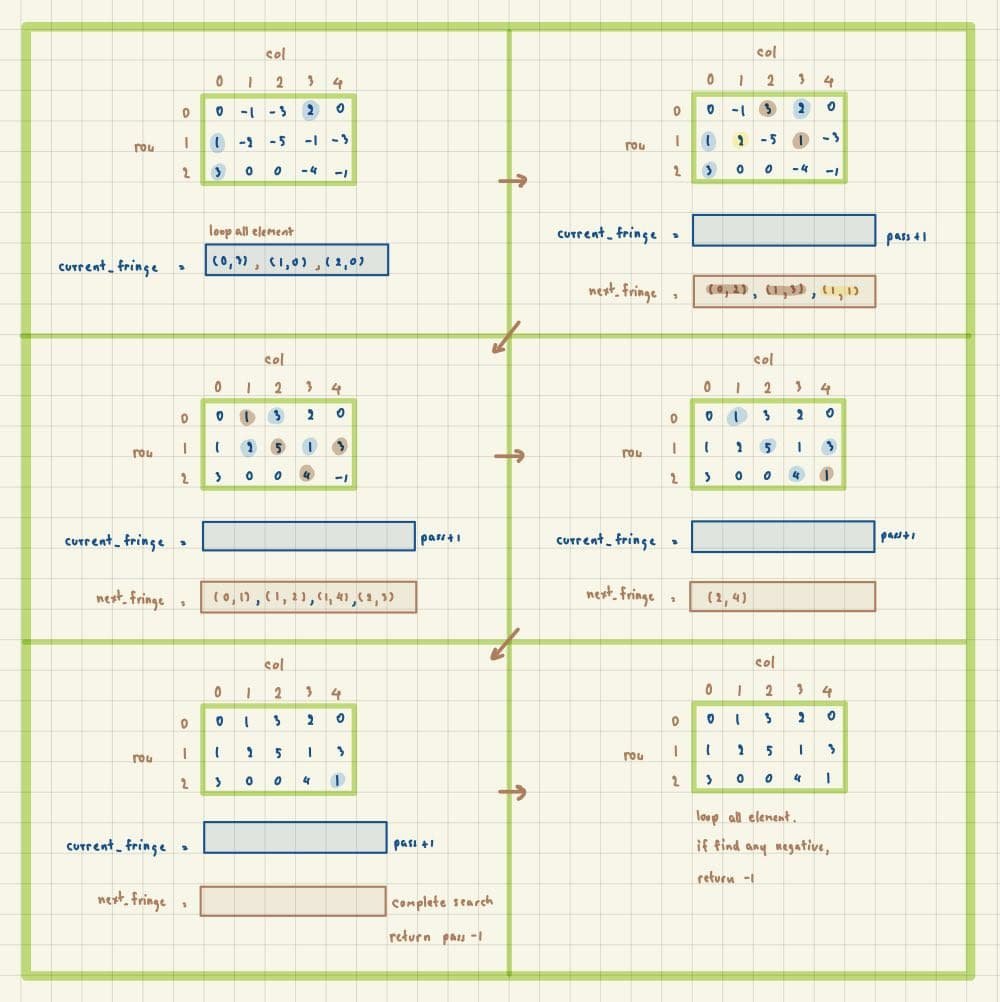

# Solution 2

Same solution as solution 1 but keep track size of current_fringe in stead of separating implement current_fringe and next_fringe

In [3]:
def minimumPassesOfMatrix(matrix):
  fringe = find_positive(matrix)
  num_passes = dfs_pass_finder(fringe, matrix)
  is_contain_negative = find_negative(matrix)
  return num_passes if not is_contain_negative else -1

def find_positive(matrix):
  positive_list = []
  for row in range(len(matrix)):
    for col in range(len(matrix[0])):
      if matrix[row][col] > 0:
        positive_list.append([row, col])
  return positive_list

def find_negative(matrix):
  for row in range(len(matrix)):
    for col in range(len(matrix[0])):
      if matrix[row][col] < 0:
        return True
  return False

def dfs_pass_finder(fringe, matrix):
  num_passes = 0
  size = len(fringe)
  while True:
    # is fringe empty?
    if size == 0:
      num_passes += 1
      size = len(fringe)
    if len(fringe) == 0:
      return num_passes - 1

    # pop front
    front = fringe.pop(0)
    front_row, front_col = front
    size -= 1

    # gen / insert successors
    neighbors = get_neighbors(front_row, front_col, matrix)
    for neighbor in neighbors:
      neighbor_row, neighbor_col = neighbor
      if matrix[neighbor_row][neighbor_col] < 0:
        matrix[neighbor_row][neighbor_col] *= -1
        fringe.append(neighbor)

def get_neighbors(row, col, matrix):
  neighbors = []
  if row > 0:
    neighbors.append([row - 1, col])
  if row < len(matrix) - 1:
    neighbors.append([row + 1, col])
  if col > 0:
    neighbors.append([row, col - 1])
  if col < len(matrix[0]) - 1:
    neighbors.append([row, col + 1])
  return neighbors

In [4]:
matrix = [
  [0, -1, -3, 2, 0],
  [1, -2, -5, -1, -3],
  [3, 0, 0, -4, -1],
]
minimumPassesOfMatrix(matrix)

3

In [5]:
matrix =[
    [1, 0, 0, -2, -3],
    [-4, -5, -6, -2, -1],
    [0, 0, 0, 0, -1],
    [1, 2, 3, 0, 3]
  ]
minimumPassesOfMatrix(matrix)

4